#### Read File

In [ ]:
import pandas as pd
import matplotlib as plt
# Specify the name of the CSV or Excel file within the zip file
file = 'PrimeTransactionsAndSubawards_2023-11-06_H20M04S00363673/Contracts_PrimeTransactions_2023-11-06_H20M04S46_1.csv'  # Change this to the actual file name

df = pd.read_csv(file)

/var/folders/l3/cczfs2cj489bg4y5zgc9f50r0000gn/T/ipykernel_18739/787719601.py:5: DtypeWarning: Columns (16,27,68,71,72,135) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


### Trend Analysis

##### Create New Data Frame

In [ ]:
df_new = df.groupby(['action_date','action_date_fiscal_year'])['federal_action_obligation'].sum().reset_index().sort_values(by=['action_date_fiscal_year','federal_action_obligation'], ascending=[False, False]).reset_index()

In [ ]:
df_new.head()

,index,action_date,action_date_fiscal_year,federal_action_obligation
0,4373,2023-10-20,2024,254111.00
1,4333,2023-06-16,2023,43005428.95
2,4262,2023-03-09,2023,28792760.75
3,4217,2023-01-03,2023,18802210.63
4,4259,2023-03-06,2023,15894067.32


##### Seasonal Decompose Model

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
season_result = seasonal_decompose(df_new['federal_action_obligation'], 'additive', period = 3) # set every 3 monthes as a period

In [ ]:
# Assuming 'df_trend_month' is your DataFrame
df_new['action_date'] = pd.to_datetime(df_new['action_date'])
df_new['month_year'] = df_new['action_date'].dt.to_period('M')

# Group by 'month_year' and sum only the numerical columns
result_df = df_new.groupby('month_year').sum(numeric_only=True)

# Convert 'month_year' to a formatted string ("%Y-%m-%d")
result_df.index = result_df.index.strftime("%Y-%m-%d")

# Display the result
result_df.head()

,index,action_date_fiscal_year,federal_action_obligation
month_year,,,
2007-10-31,276,48192,9750497.36
2007-11-30,759,44176,31122593.33
2007-12-31,1110,40160,50516412.77
2008-01-31,1860,48192,27370321.29
2008-02-29,2211,44176,87654836.32


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
season_result = seasonal_decompose(result_df['federal_action_obligation'], 'additive', period = 3) # set every 3 monthes as a period, can also set as 12(one-year) to see the difference

In [ ]:
observed = season_result.observed
trended = season_result.trend
seasonal = season_result.seasonal
residual = season_result.resid

season_result_df = pd.DataFrame({"observed":observed, "trend": trended, "seasonal":seasonal,"residual":residual})

##### Visualization

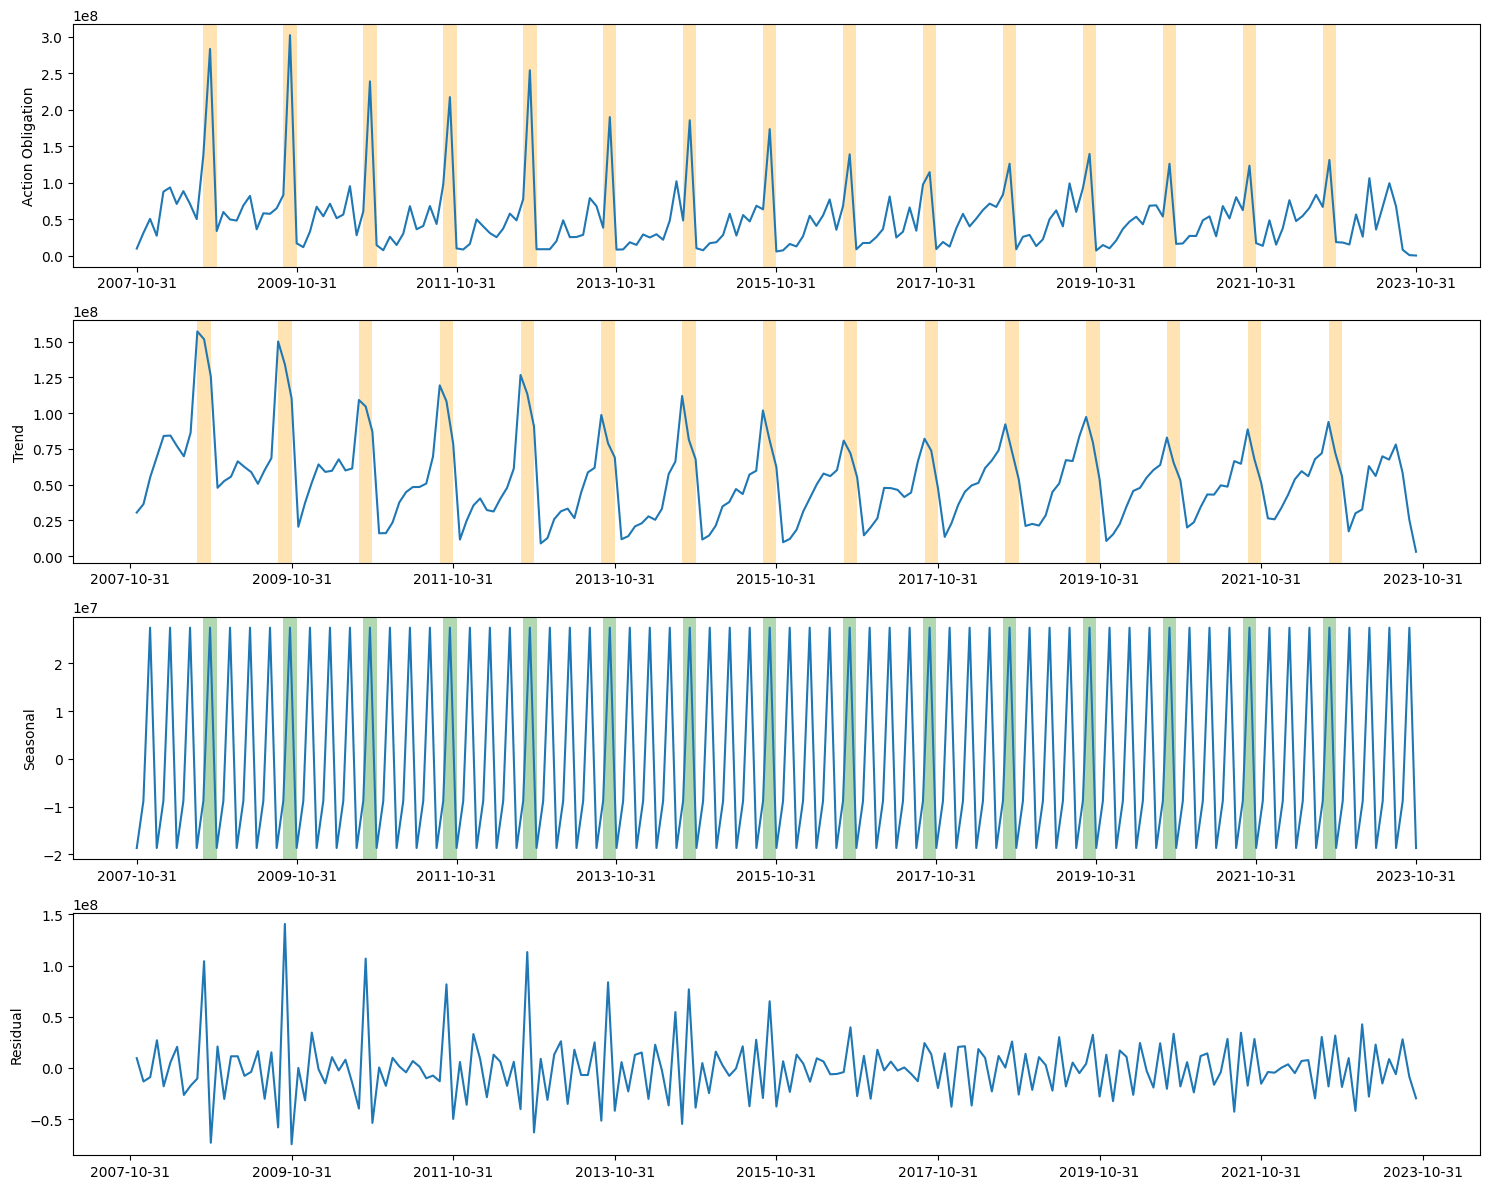

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

figure_df = pd.DataFrame({"date": result_df.index,"observed":observed, "trend": trended, "seasonal":seasonal,"residual":residual})

step= 24

# Plot the decomposed components
# figure_df.observed.plot(ax=ax1)
ax1.plot(figure_df.observed)
ax1.set_ylabel('Action Obligation')
ax1.set_xlabel('')
ax1.set_xticks(figure_df['date'][::step])

# loop to color every Sep and Oct each year, since Oct 31st is the end of fisal year
for i in range(8, 23):
    ax1.axvspan("20{}-08-31".format(str(i).zfill(2)),"20{}-10-31".format(str(i).zfill(2)), color='orange', alpha=0.3, lw=0)

ax2.plot(figure_df.trend)
ax2.set_ylabel('Trend')
ax2.set_xlabel('')
ax2.set_xticks(figure_df['date'][::step])
# loop to color every Sep and Oct each year, since Oct 31st is the end of fisal year
for i in range(8, 23):
    ax2.axvspan("20{}-08-31".format(str(i).zfill(2)),"20{}-10-31".format(str(i).zfill(2)), color='orange', alpha=0.3, lw=0)


ax3.plot(figure_df.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_xlabel('')
ax3.set_xticks(figure_df['date'][::step])
# loop to color every Sep and Oct each year, since Oct 31st is the end of fisal year
for i in range(8, 23):
    ax3.axvspan("20{}-08-31".format(str(i).zfill(2)),"20{}-10-31".format(str(i).zfill(2)), color='green', alpha=0.3, lw=0)

ax4.plot(figure_df.residual)
ax4.set_ylabel('Residual')
ax4.set_xlabel('')
ax4.set_xticks(figure_df['date'][::step])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()